In [2]:
import pandas as pd
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin' :
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows' :
    path = "C:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system.')

clmy_msg = pd.read_csv('C:\\Users\\astnv\\Desktop\\Python\\Anaconda\\Project\\CLMY_MSG_KR.csv', encoding = 'cp949')

clmy_name = clmy_msg['재난유형명'].unique() # 재난유형명의 종류를 모아둔 리스트

clmy_name_value = list(clmy_msg['재난유형명'].values) # '재난유형명' 항목의 모든 값을 모아둔 리스트
clmy_date_value = list(clmy_msg['수신일시'].values) # '수신일시' 항목의 모든 값을 모아둔 리스트

msg_count = [] # 재난유형의 종류별 문자의 갯수를 모아두는 리스트

def getYear(year):
    length = len(year)
    result = year[length - 4] + year[length - 3] + year[length - 2] + year[length - 1]
    return result

def getmaximum(lst):
    maximum = lst[0]
    for i in range(len(lst)):
        if maximum < lst[i]:
            maximum = lst[i]
        
    return maximum

k = 0
for i in clmy_date_value:
    clmy_date_value[k] = getYear(i)
    k += 1

for i in clmy_name:
    msg_count.append(clmy_name_value.count(i))

max_clmy = clmy_name[msg_count.index(getmaximum(msg_count))] # max_clmy : 가장 많은 문자 수를 가진 재난의 종류
print(max_clmy) 

Databox = {} # DataFrame을 만들기 위해 선언한 딕셔너리형 변수

Databox['재난유형명'] = clmy_name
Databox['문자 개수'] = msg_count

msg = pd.DataFrame(Databox)
msg = msg[['재난유형명', '문자 개수']]
msg.set_index('재난유형명', inplace = True)
msg.sort_values(by='문자 개수', ascending = False)

풍랑,강풍


,문자 개수
재난유형명,
"풍랑,강풍",1463
호우,1230
기타,867
안개,628
대설,613
건조,254
폭염,184
태풍,116
지진,113


In [3]:
# 호우의 연도별 메시지 발송 현황 살펴보기

year_list = [] # 메시지들 중 '호우'로 인해 발송된 메시지의 연도값을 전부 저장하는 리스트
year_count_msg = []

def list_sorting(lst):
    sorting_list = lst[:]
    sorting_list.sort()
    temp = [] # 중복된 값의 인덱스 값이 저장될 임시 리스트 변수

    for i in range(len(sorting_list) - 1):
        if (sorting_list[i] == sorting_list[i+1]):
            temp.append(i)       

    temp.reverse()

    for i in temp:
        del sorting_list[i] 
        
    return sorting_list

j = 0
for i in clmy_name_value:
    if i == "호우":
        year_list.append(clmy_date_value[j])
    j += 1
    
year_sorting = list_sorting(year_list) # year_sorting 변수에 년도의 종류를 저장한다.

for i in year_sorting:
    year_count_msg.append(year_list.count(i))

clmy_msg = {}    
clmy_msg['년도'] = year_sorting
clmy_msg['개수'] = year_count_msg

total = pd.DataFrame(clmy_msg)
total = total[['년도', '개수']]
total

,년도,개수
0,2016,241
1,2017,466
2,2018,510
3,2019,13


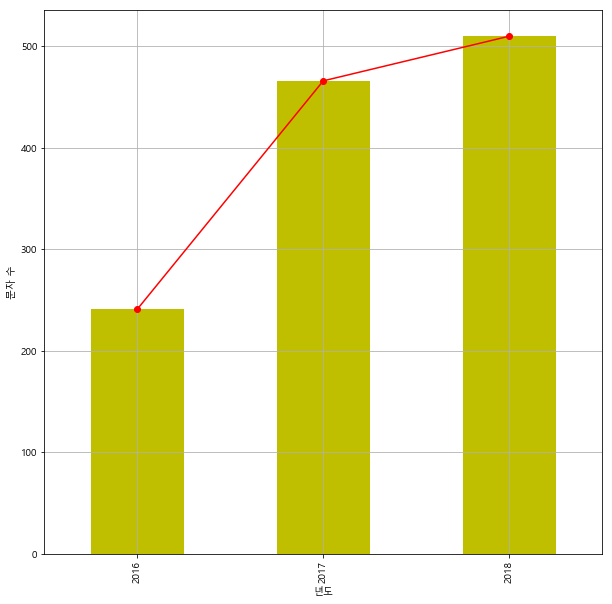

In [14]:
# 2019년도의 메시지 수를 제거하고, 나온 데이터를 막대 그래프의 형식으로 나타낸다.
import matplotlib.pyplot as plt
%matplotlib inline

year_sorting2 = year_sorting[:3]
year_count_msg2 = year_count_msg[:3]

clmy_msg2 = {}    
clmy_msg2['년도'] = year_sorting2
clmy_msg2['문자 수'] = year_count_msg2

clmy_msg3 = {}    
clmy_msg3['년도'] = year_sorting2
clmy_msg3['문자 수'] = year_count_msg2

total2 = pd.DataFrame(clmy_msg2)
total2 = total2[['년도', '문자 수']]
total2.set_index('년도', inplace = True)

total3 = pd.DataFrame(clmy_msg3)

total2['문자 수'].plot(kind = 'bar', color = 'y', figsize = (10, 10))
plt.plot(total3['년도'], total3['문자 수'], marker='o', color='r')
plt.xlabel('년도')
plt.ylabel('문자 수')
plt.grid()
plt.show()
